In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import tensorflow as tf


In [151]:
class 퍼셉트론:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def __call__(self, Xs):
        z = np.dot(Xs, self.w) + self.b
        return np.where(z > 0, 1, -1)

    def 학습(self, data, target, 학습횟수=1, 학습률=1.0):
        표본수, 특성수 = data.shape
        # 매개변수 초기화
        self.w = np.zeros(특성수)
        self.b = 0.0

        정답 = target
        for 학습 in range(학습횟수):
            print(f'학습 {학습}: w = {self.w},  b = {self.b}')
            for xi, yi in zip(data, 정답):
                예측 = self(xi)
                오류 = yi - 예측
                갱신 = 오류 * 학습률
                self.w += 갱신 * xi
                self.b += 갱신

# Define the values for w_and and b_and
w_and = np.array([0.5, 0.5])
b_and = -0.7


AND = 퍼셉트론(w=w_and, b=b_and)
Xs = np.array([[0,0], [0,1], [1,0], [1,1]])
# 정답 
y_and = np.array([-1,-1,-1,1])
# 지도학습
AND.학습(data=Xs, target=y_and, 학습횟수=10, 학습률=1.0)
# 학습 결과 확인
ys = AND(Xs)
assert all(ys == np.array([-1, -1, -1, 1]))
print(f'xs -> 퍼셉트론 -> ys = {ys}')


학습 0: w = [0. 0.],  b = 0.0
학습 1: w = [2. 2.],  b = 2.0
학습 2: w = [4. 2.],  b = 0.0
학습 3: w = [4. 2.],  b = -2.0
학습 4: w = [4. 4.],  b = -2.0
학습 5: w = [4. 2.],  b = -4.0
학습 6: w = [4. 2.],  b = -4.0
학습 7: w = [4. 2.],  b = -4.0
학습 8: w = [4. 2.],  b = -4.0
학습 9: w = [4. 2.],  b = -4.0
xs -> 퍼셉트론 -> ys = [-1 -1 -1  1]


In [152]:
from sklearn.datasets import load_iris
iris = load_iris()

In [153]:
# 훈련/시험 데이터 분리
from sklearn.model_selection import train_test_split
훈련데이터, 시험데이터, 훈련정답, 시험정답 = train_test_split(iris.data, iris.target, test_size=0.25, shuffle=True, random_state=1, stratify=iris.target)
print(f'{len(iris.data)} = {len(훈련데이터)} + {len(시험데이터)}')

# 라벨 도수
print(np.unique(iris.target, return_counts=True))
print(np.unique(훈련정답, return_counts=True))
print(np.unique(시험정답, return_counts=True))


150 = 112 + 38
(array([0, 1, 2]), array([50, 50, 50]))
(array([0, 1, 2]), array([38, 37, 37]))
(array([0, 1, 2]), array([12, 13, 13]))


In [154]:
# y = {0, 1}
라벨필터1 = np.logical_or(훈련정답 == 0, 훈련정답 == 1)
np.unique(훈련정답[라벨필터1], return_counts=True)
X1_train = 훈련데이터[라벨필터1]
y1_train = 훈련정답[라벨필터1]
assert len(X1_train) == len(y1_train)
# {0, 1} -> {-1, 1}
y1_train = np.where(y1_train == 0, -1, 1)
assert all(np.unique(y1_train) == np.array([-1, 1]))

In [155]:
# y = {0, 1}
라벨필터1 = np.logical_or(시험정답 == 0, 시험정답 == 1)
np.unique(시험정답[라벨필터1], return_counts=True)
X1_test = 시험데이터[라벨필터1]
y1_test = 시험정답[라벨필터1]
assert len(X1_test) == len(y1_test)
# {0, 1} -> {-1, 1}
y1_test = np.where(y1_test == 0, -1, 1)
assert all(np.unique(y1_test) == np.array([-1, 1]))

In [156]:
X1_train.shape, X1_test.shape

((75, 4), (25, 4))

In [157]:
붓꽃분류기1 = 퍼셉트론()
붓꽃분류기1.학습(data=X1_train[:, [0,2]], target=y1_train, 학습횟수=10, 학습률=0.1)
# 매개변수
print(f'w = {붓꽃분류기1.w}, b = {붓꽃분류기1.b}')
예측 = 붓꽃분류기1(X1_test[:, [0,2]])
채점 = 예측 == y1_test
print(f'{sum(채점)} / {len(채점)}, 정확도: {np.mean(채점):.0%}')


TypeError: __init__() missing 2 required positional arguments: 'w' and 'b'

/var/folders/jc/1rcjj0kj5zv2wck43jqpwzlw0000gn/T/ipykernel_999/3215855163.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris.frame['품종'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)


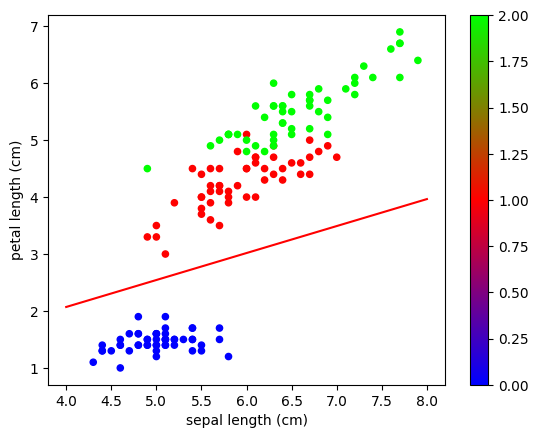

In [ ]:
iris.frame = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.frame['품종'] = iris.target
iris.frame['품종'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)
# 2-D 산점도
iris.frame.plot(kind='scatter', x=0, y=2, c=iris.target, colormap='brg')
# 결정경계
z0 = lambda x, w, b: -(w[0]*x + b)/w[1]
x = np.linspace(4, 8, 100)
plt.plot(x, z0(x, 붓꽃분류기1.w, 붓꽃분류기1.b), 'r-')
plt.show()

## 결정 경계

학습 0: w = [0. 0.],  b = 0.0
학습 1: w = [2. 2.],  b = 2.0
학습 2: w = [4. 2.],  b = 0.0
학습 3: w = [4. 2.],  b = -2.0
학습 4: w = [4. 4.],  b = -2.0


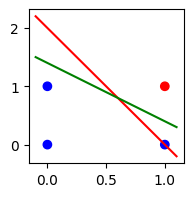

In [ ]:
AND = 퍼셉트론()
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([-1,-1,-1,1])
AND.학습(X, y_and, 학습횟수=5)
assert all(AND(X) == y_and)

plt.figure(figsize=(2, 2))
plt.scatter(X[:,0], X[:,1], c=y_and, cmap='bwr')
# 결정경계: z=0
z0 = lambda x, w, b: (w[0] * x + b) / -w[1]
x1 = np.linspace(-0.1, 1.1)
plt.plot(x1, z0(x1, AND.w, AND.b), 'r-')

# 또 다른 결정경계
plt.plot(x1, z0(x1, w=np.array([0.5, 0.5]), b=-0.7), 'g-')
plt.show()

In [ ]:
def label_filter(data, labels, label_values):
    filter_condition = np.isin(labels, label_values)
    print(np.unique(labels[filter_condition], return_counts=True))
    filtered_data = data[filter_condition]
    filtered_labels = labels[filter_condition]
    assert len(filtered_data) == len(filtered_labels)
    # Convert labels to {-1, 1}
    label_map = {label_values[0]: -1, label_values[1]: 1}
    filtered_labels = np.array([label_map[label] for label in filtered_labels])
    assert all(np.unique(filtered_labels) == np.array([-1, 1]))
    return filtered_data, filtered_labels

# Usage
label_values = [0, 1]  # You can set your desired label values here
X1_train, y1_train = label_filter(훈련데이터, 훈련정답, label_values)

(array([0, 1]), array([38, 37]))


In [ ]:
X2_train, y2_train = label_filter(훈련데이터, 훈련정답, [1, 2])
X2_test, y2_test = label_filter(시험데이터, 시험정답, [1, 2])

붓꽃분류기2 = 퍼셉트론()
붓꽃분류기2.학습(data=X2_train[:, [0,2]], target=y2_train, 학습횟수=10, 학습률=0.1)
# 평가
예측 = 붓꽃분류기2(X2_test[:, [0,2]])
채점 = 예측 == y2_test
print(f'{sum(채점)} / {len(채점)}, 정확도: {np.mean(채점):.0%}')

(array([1, 2]), array([37, 37]))
(array([1, 2]), array([13, 13]))
학습 0: w = [0. 0.],  b = 0.0
학습 1: w = [-1.7   1.62],  b = -0.8
학습 2: w = [-2.28  3.06],  b = -1.2
학습 3: w = [-2.92  4.08],  b = -1.7999999999999998
학습 4: w = [-3.2  4.7],  b = -1.9999999999999998
학습 5: w = [-3.4   5.02],  b = -2.1999999999999997
학습 6: w = [-4.26  5.22],  b = -2.6
학습 7: w = [-4.18  6.06],  b = -2.8000000000000003
학습 8: w = [-4.46  6.5 ],  b = -3.0000000000000004
학습 9: w = [-5.28  6.7 ],  b = -3.400000000000001
23 / 26, 정확도: 88%


/var/folders/jc/1rcjj0kj5zv2wck43jqpwzlw0000gn/T/ipykernel_999/3675955864.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris.frame['품종'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)


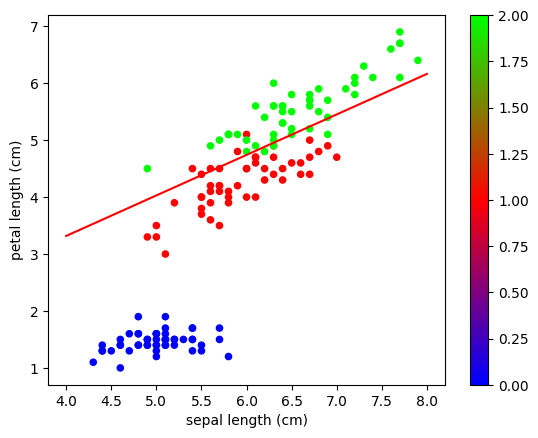

In [ ]:
iris.frame = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.frame['품종'] = iris.target
iris.frame['품종'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)
# 2-D 산점도
iris.frame.plot(kind='scatter', x=0, y=2, c=iris.target, colormap='brg')
# 결정경계
z0 = lambda x, w, b: -(w[0]*x + b)/w[1]
x = np.linspace(4, 8, 100)
plt.plot(x, z0(x, 붓꽃분류기2.w, 붓꽃분류기2.b), 'r-')
plt.show()

학습 0: w = [0. 0.],  b = 0.0
학습 1: w = [0. 2.],  b = 2.0
학습 2: w = [2. 2.],  b = 2.0
학습 3: w = [2. 2.],  b = 0.0
학습 4: w = [2. 2.],  b = 0.0
학습 0: w = [0. 0.],  b = 0.0
학습 1: w = [-2.  0.],  b = 0.0
학습 2: w = [-2.  0.],  b = 2.0
학습 3: w = [-2.  0.],  b = 2.0
학습 4: w = [-2.  0.],  b = 2.0
학습 5: w = [-2.  0.],  b = 2.0
학습 6: w = [-2.  0.],  b = 2.0
학습 7: w = [-2.  0.],  b = 2.0
학습 8: w = [-2.  0.],  b = 2.0
XOR 문제는 선형 분리가 불가능합니다.


/var/folders/jc/1rcjj0kj5zv2wck43jqpwzlw0000gn/T/ipykernel_999/885378877.py:20: RuntimeWarning: divide by zero encountered in divide
  z0 = lambda x, w, b: (w[0] * x + b) / -w[1]


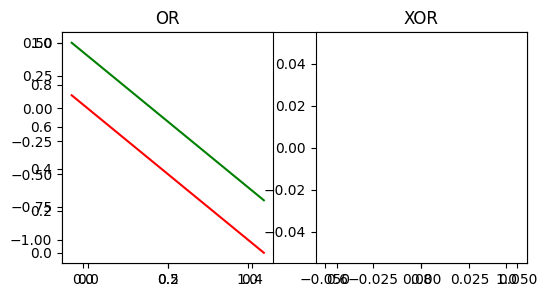

In [ ]:
OR = 퍼셉트론()
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([-1, 1, 1, 1])
OR.학습(X, y_or, 학습횟수=5)
assert all(OR(X) == y_or)

XOR = 퍼셉트론()
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([-1, 1, 1, -1])
XOR.학습(X, y_xor, 학습횟수=9)
try:
    assert all(XOR(X) == y_xor)
except AssertionError:
    print('XOR 문제는 선형 분리가 불가능합니다.')

# 시각화
plt.figure(figsize=(6, 3))
plt.scatter(X[:,0], X[:,1], c=y_or, cmap='bwr')
# 결정경계: z=0
z0 = lambda x, w, b: (w[0] * x + b) / -w[1]
x1 = np.linspace(-0.1, 1.1)
# OR
subplot = plt.subplot(1, 2, 1)
plt.title('OR')
plt.plot(x1, z0(x1, OR.w, OR.b), 'r-')
plt.plot(x1, z0(x1, w=np.array([0.5, 0.5]), b=-0.2), 'g-')

# XOR
subplot = plt.subplot(1, 2, 2)
plt.title('XOR')
plt.plot(x1, z0(x1, XOR.w, XOR.b), 'b-')
plt.show()

# 1970년대 다층 퍼셉트론

In [ ]:
# 진리표 입력
X = np.array([[0,0], [0,1], [1,0], [1,1]])
AND = 퍼셉트론()
y_and = np.array([-1, -1, -1, 1])
AND.학습(X, y_and, 학습횟수=5)
assert all(AND(X) == y_and)

OR = 퍼셉트론()
y_or = np.array([-1, 1, 1, 1])
OR.학습(X, y_or, 학습횟수=5)
assert all(OR(X) == y_or)

NAND = 퍼셉트론()   
y_nand = np.array([1, 1, 1, -1])
NAND.학습(X, y_nand, 학습횟수=5)
assert all(NAND(X) == y_nand)


학습 0: w = [0. 0.],  b = 0.0
학습 1: w = [2. 2.],  b = 2.0
학습 2: w = [4. 2.],  b = 0.0
학습 3: w = [4. 2.],  b = -2.0
학습 4: w = [4. 4.],  b = -2.0
학습 0: w = [0. 0.],  b = 0.0
학습 1: w = [0. 2.],  b = 2.0
학습 2: w = [2. 2.],  b = 2.0
학습 3: w = [2. 2.],  b = 0.0
학습 4: w = [2. 2.],  b = 0.0
학습 0: w = [0. 0.],  b = 0.0
학습 1: w = [-2. -2.],  b = 0.0
학습 2: w = [-4. -2.],  b = 2.0
학습 3: w = [-4. -2.],  b = 4.0
학습 4: w = [-4. -4.],  b = 4.0


In [ ]:
s1 = NAND(X)
s2 = OR(X)
S = np.array([s1, s2]).T
assert all(AND(S) == np.array([-1, 1, 1, -1]))

## 1980년대 신경망

In [ ]:
x = np.array([0.1, 0.2])

특징차원 = 2
p1 = 퍼셉트론(w=np.random.randn(특징차원), b=np.random.randn())
p2 = 퍼셉트론(w=np.random.randn(특징차원), b=np.random.randn())
p3 = 퍼셉트론(w=np.random.randn(특징차원), b=np.random.randn())

# 계층 출력
h1 =p1(x)
h2 =p2(x)
h3 =p3(x)

H = np.array([h1, h2, h3])
print(H)

[ 1  1 -1]


# 활성화 함수 (비선형 함수)

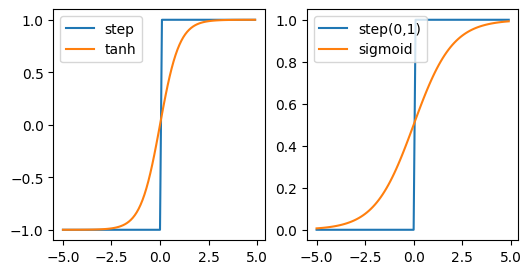

In [ ]:
def step(z, min_value=-1, max_value=1):
    return np.where(z>0, max_value, min_value)

sigmoid = lambda z: 1 / (1 + np.exp(-z))

plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
z = np.arange(-5, 5, 0.1)
plt.plot(z, step(z), label='step')
plt.plot(z, np.tanh(z), label='tanh')
plt.legend()
plt.subplot(1,2,2)
plt.plot(z, step(z,0,1), label='step(0,1)')
plt.plot(z, sigmoid(z), label='sigmoid')
plt.legend()
plt.show()

In [ ]:
class 완전연결:
    def __init__(self, 입력수, 출력수, 활성화=None):
        self.W = np.random.randn(입력수, 출력수)
        self.b = np.random.randn(출력수)
        self.활성화 = 활성화

    def __call__(self, X):
        Z = np.dot(X, self.W) + self.b
        if self.활성화:
            Z = self.활성화(Z)
        return Z

class 신경망:
    def __init__(self):
        self.layers = []

    def add(self, layer):
        """계층 추가"""
        self.layers.append(layer)

    def __call__(self, x):
        """순전파"""
        output = x
        for layer in self.layers:
            output = layer(output)
        return output
    
FC = 완전연결

activation = sigmoid
layer1 = FC(입력수=2, 출력수=3, 활성화=activation)
layer2 = FC(입력수=3, 출력수=2, 활성화=activation)
layer3 = FC(입력수=2, 출력수=2)

# 순전파 (forward propagation, feed forward)
x = np.array([0.1, 0.2])
H1 = layer1(x)
H2 = layer2(H1)
y = layer3(H2)

model = 신경망()
model.add(layer1)
model.add(layer2)
model.add(layer3)
assert all(model(x) == y)

print(f'x={x}\n-> H1={H1}\n-> H2={H2}\n-> y={y}')

x=[0.1 0.2]
-> H1=[0.42646618 0.5921678  0.73143495]
-> H2=[0.38990605 0.37110926]
-> y=[-0.02641024  0.08994025]


# 응용사례: 손글씨 인식하기

In [ ]:
import pickle

with open('data/mnist/mnist_ndarray.pkl', 'rb') as f:
    mnist = pickle.load(f)

(train_images, train_labels), (test_images, test_labels) = mnist    

print(train_images.shape, test_images.shape)
assert len(train_images) == len(train_labels)
assert len(test_images) == len(test_labels)

print(pd.Series(train_labels).value_counts().sort_index())

(60000, 28, 28) (10000, 28, 28)
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


In [ ]:
print(train_images.dtype)
print(f'{train_images.min()} <= Pixel <= {train_images.max()}') 

uint8
0 <= Pixel <= 255


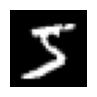

In [ ]:
image = train_images[0]

plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.show()

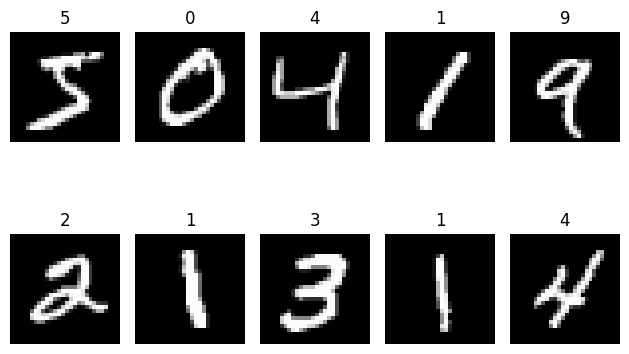

In [ ]:
그림틀, 그래프들 = plt.subplots(2, 5)
for 그래프, 이미지, 라벨 in zip(그래프들.flat, train_images, train_labels):
    그래프.imshow(이미지, cmap='gray')
    그래프.set_title(라벨)
    그래프.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def 전처리(images, 목표형상):
    # 이미지 형상 조정
    images = images.reshape(-1, *목표형상)
    # 정규화: 0~255 -> 0~1
    images = images / 255
    return images.astype('float32')

목표형상 = (784,)
X_train = 전처리(train_images, 목표형상)
X_test = 전처리(test_images, 목표형상)
assert 목표형상 == X_train.shape[1:] == X_test.shape[1:]
assert np.allclose(X_train[0].max(), 1.0)
print(f'{train_images.shape} -> {X_train.shape}')   
print(f'{test_images.shape} -> {X_test.shape}')

(60000, 28, 28) -> (60000, 784)
(10000, 28, 28) -> (10000, 784)


In [ ]:
model = 신경망()
# 은닉층
model.add(FC(입력수=784, 출력수=50, 활성화=sigmoid))
model.add(FC(입력수=50, 출력수=100, 활성화=sigmoid))
model.add(FC(입력수=100, 출력수=10)) # 출력층

In [ ]:
outputs = model(X_test)
print(f'입력: {X_test.shape} -> 신경망 -> 출력: {output.shape}')

입력: (10000, 784) -> 신경망 -> 출력: (10000, 10)


# 출력 처리

In [ ]:
z_last = np.array([[0.1, 0.2, 0.3], 
                  [0.2, 0.3, 0.1], 
                  [0.3, 0.1, 0.2]])

y_pred = np.argmax(z_last, axis=1)
y_pred

array([2, 1, 0])

In [ ]:
pd.DataFrame(outputs[:10])

,0,1,2,3,4,5,6,7,8,9
0,-4.246997,-5.198658,2.691582,6.466290,-0.071631,0.443145,-6.015078,4.554680,-10.362875,-5.844181
1,-11.945343,-2.515891,0.526973,11.737479,-4.520778,6.931345,-4.669815,10.252302,-7.218802,-2.809741
2,-6.563026,1.097351,4.711430,1.555954,3.828828,4.659877,-2.267491,2.743273,-7.071434,-2.209901
3,-5.972835,-3.758653,0.064978,6.688103,-3.597103,6.657546,-5.822177,9.275110,-8.595460,1.268968
4,-3.887626,-0.687163,2.883084,6.998353,-5.627779,6.242238,0.010007,8.714673,-7.296969,3.708619
5,-7.574771,1.722724,5.273557,3.363879,2.527008,4.208120,-2.932429,5.553805,-10.161496,0.063195
6,-10.292237,-3.069476,3.722402,6.163306,1.000837,3.528153,-5.613394,4.655916,-10.929194,-0.961907
7,-8.174687,-2.237100,6.616527,3.086588,0.190573,4.991383,1.450079,9.210809,-11.062330,6.143699
8,-5.985512,-1.571229,0.007184,4.840019,-5.011345,0.547503,-1.768027,10.405055,-12.760784,0.723024
9,-7.850575,-4.585243,6.882471,3.907324,-1.116277,0.082824,-2.412331,8.992396,-7.831023,2.633532


In [ ]:
y_pred = np.argmax(outputs, axis=1)
print(y_pred[:5] , '?=', test_labels[:5])
채점 = y_pred == test_labels
print(f'정확도: {np.mean(채점):.2%}')

[3 3 2 7 7] ?= [7 2 1 0 4]
정확도: 10.00%


# 학습된 매개변수 적용

In [159]:
import pickle

with open('data/mnist/mnist_weight.pkl', 'rb') as f:
    weights = pickle.load(f)

model = 신경망()
model.add(FC(입력수=784, 출력수=50, 활성화=sigmoid))
model.add(FC(입력수=50, 출력수=100, 활성화=sigmoid))
model.add(FC(입력수=100, 출력수=10))

for layer, (W, b) in zip (model.layers, weights):
    print(layer.W.shape, W.shape)
    assert layer.W.shape == W.shape
    assert layer.b.shape == b.shape
    # 학습된 가중치를 모형에 적용하기
    layer.W = W
    layer.b = b

outputs = model(X_test)
y_pred = np.argmax(outputs, axis=1)
print(f'정확도: {np.mean(y_pred == test_labels):.2%}')
    

(784, 50) (784, 50)
(50, 100) (50, 100)
(100, 10) (100, 10)
정확도: 93.52%
